## Final Project Submission

Please fill out:
* Student name: Stefan Bauer


# Data Science Life Cycle 

## 01 Business Understanding:

* predict the houseprices for the Kings County
* ask relevant questions:
    * What are the key determinants for a houseprice
    * Are there any special factors for that particular county
    * **For whom do I make this Project? Which segment (in terms of prices, and maybe bathrooms, etc)**
        * **Low and middle price class**
        * do they have to put extra money in the investment **or** can they save some money if they are able to handle tools -> renovated in the last 10 years
        * are there any other abnormalities in the data regarding the prcie?
        
    * Data: What are the variables all about and are they maybe connected to each other

## 02 Data Mining

* load the relevant dataset into the notebook

First, clean the namespace:

In [332]:
reset -fs 

In [333]:
# Load the relevant packages for all DS-Steps:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.graph_objects as go
import math
import logging
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

In [334]:
# Load the data_set:
hp = pd.read_csv("King_County_House_prices_dataset.csv")

## 03 Data Cleaning
* fix inconsistencies and handle the missing values

In [229]:
# Getting a feeling:
hp.shape

(21597, 21)

* The dataset contains 21597 observations for 21 variables
* Have a look at the variables and find out what they contain

In [230]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Check for missing values

In [231]:
Check1 = hp.isna().sum().sort_values(ascending=False)
Check1

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

**Missing values**:
* overall it does not seem, that there is a huge problem in the dataset with missing/0 values
* yr_renovated does have some missing values, which i will replace with 0s
* view also has some missing values, which i will also replace with 0s
* waterfront has also problems, but the variable is not important for me

In [163]:
#Checking yr_renovated:
hp.yr_renovated.head(13)

0        0.0
1     1991.0
2        NaN
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       NaN
Name: yr_renovated, dtype: float64

**Replace missing values with 0s**

1. yr_renovated:

In [232]:
hp.yr_renovated = hp.yr_renovated.fillna(0)
hp.yr_renovated.head(13)

0        0.0
1     1991.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
Name: yr_renovated, dtype: float64

2. view:

In [233]:
hp.view = hp.view.fillna(0)


In [234]:
#Check if the replacement is done:
total = hp.isna().sum().sort_values(ascending=False)
total

waterfront       2376
sqft_lot15          0
view                0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [235]:
hp.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233181,3.409825,7.657915,1788.596842,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.764673,0.650546,1.173200,827.759761,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Meaning of the variables (and potential problems):

* **sqft_living** = squarefoots of the living area (**outlier Problem**)
* **sqft_lot** = squarefoots of the property
* **Bedrooms/Bathrooms**: Number of rooms (according to the box plots below, there seems to be a problem with outliers)
* **Floors**: Amount of floors (what does 3.5 mean?)
* **Waterfront** is a dummy (only 2 values: 1 = Waterfront and 0=no Waterfront)
* **View** Has been viewed (Missing values are in this case 0s)
* **condition** - How good the condition is (Object from 1 to 5)
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated (there are missing values-filled with zeroes)/maybe compute a new feature
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



It seems that the variables bathrooms and bedrooms do have a problem with outliers, this is especially relevant for the predictive regression model introduced later.

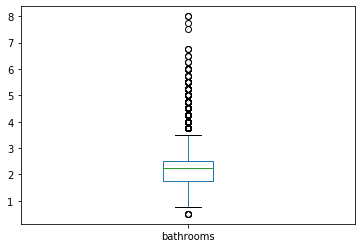

In [168]:
hp.bathrooms.plot.box();

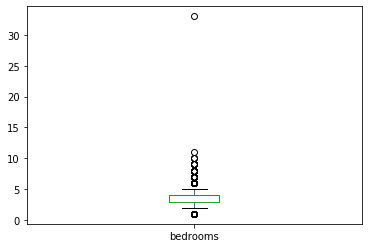

In [169]:
hp.bedrooms.plot.box();

There seems to be a huge problem with outliers. For my Business Case, I can simply remove the bedrooms that are greater than 7

In [237]:
hp = hp[hp.bedrooms < 7]

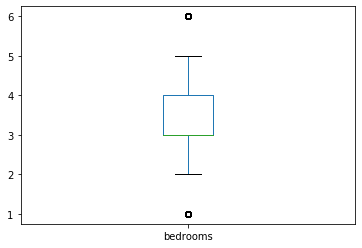

In [239]:
hp.bedrooms.plot.box();

* still outliers but it looks way better

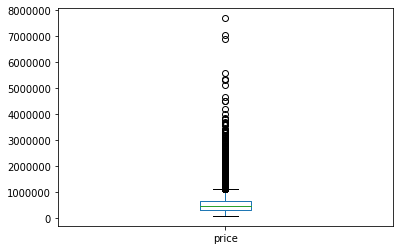

In [174]:
hp.price.plot.box();

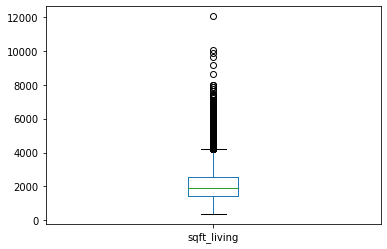

In [175]:
hp.sqft_living.plot.box();

### Divide the sample:
* Focus on low and high prising houses only
* Definition low and high pricing: the price of a house is smaller or equal than 500.000

In [241]:
hp_mid = hp[hp.price <= 500000]
hp_mid.shape

(12532, 21)

## 04 Data Exploration

### Getting the big picture:

### Heat Map:

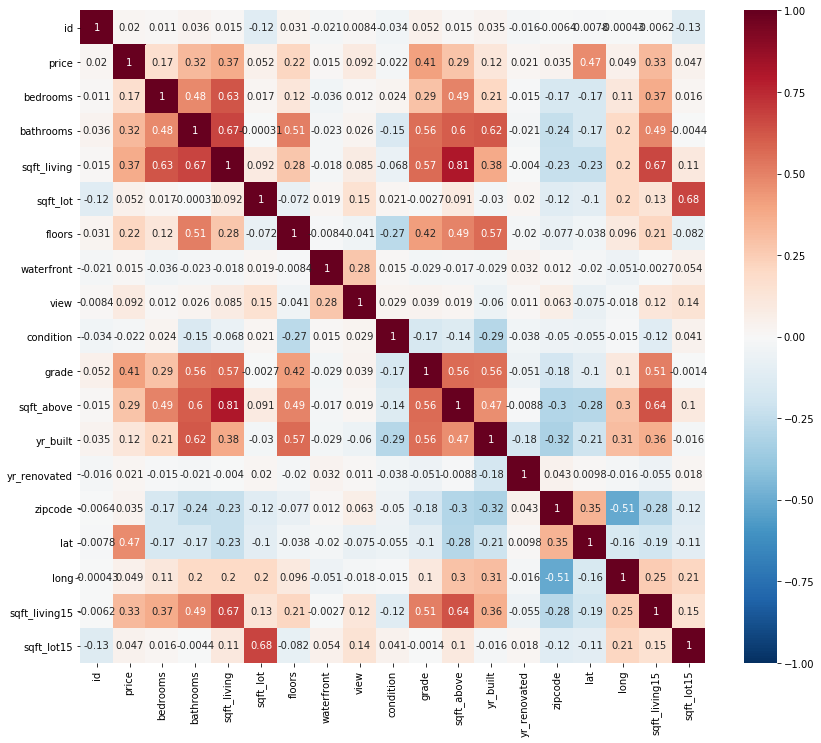

In [242]:
correlation = hp_mid.corr()
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlation, annot = True, linewidths = 0, vmin = -1, cmap="RdBu_r")

* Following variables seem to have a relativley large correlation with price:
     * bathroom (0.32)
     * sqft_living (0.37)
     * floors (0.22)
     * grade (0.41)
     * sqft_above (0.60)
     * grade (0.41)
     * living15 (0.33)

### Plot the relevant variables

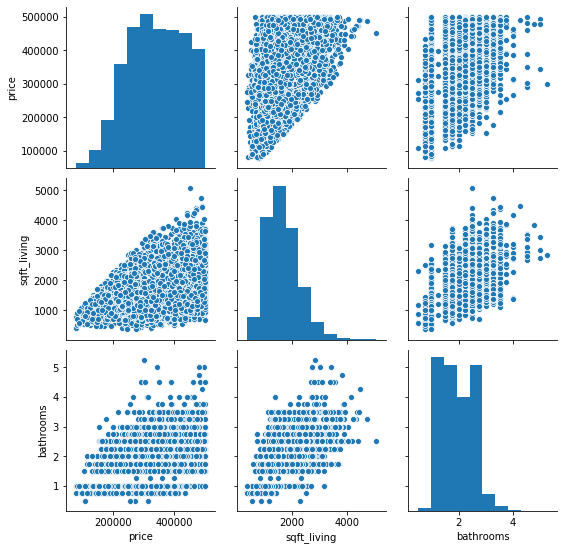

In [74]:
sns.pairplot(hp_mid, vars = ['price', 'sqft_living', 'bathrooms'])

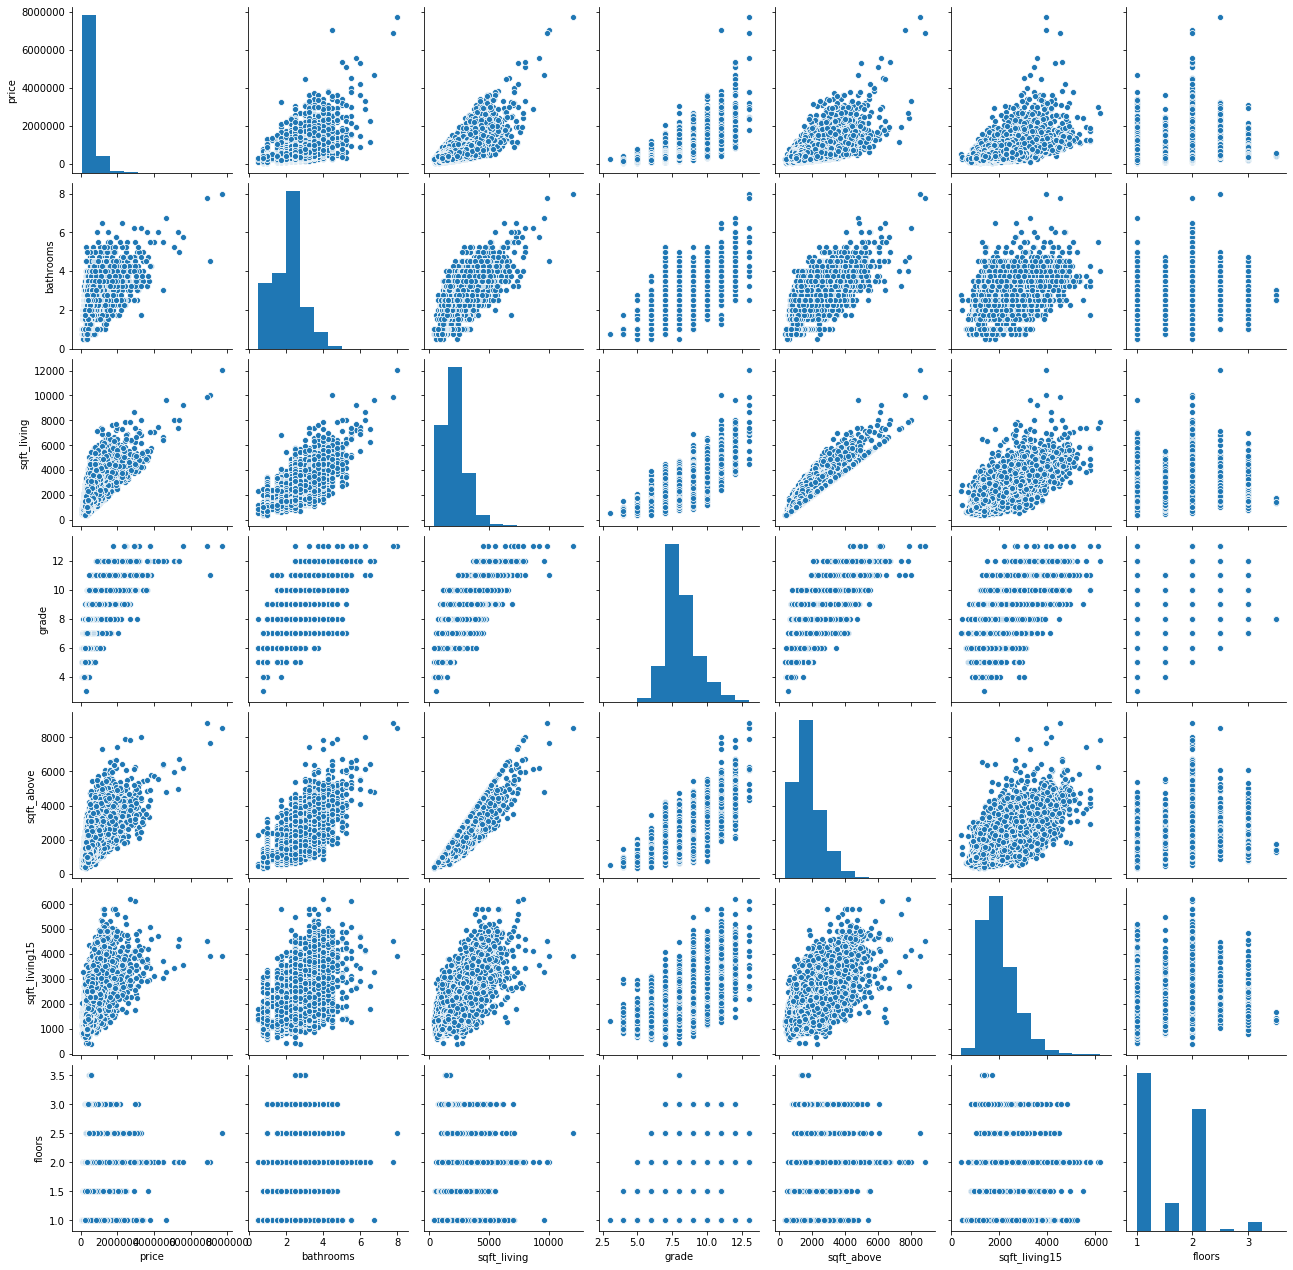

In [243]:
sns.pairplot(hp, vars = ['price', 'bathrooms','sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'floors']);

* the scatter plots support the conclusions from the heatmap above
* square foot living and square foot above seem to be correlated (which is not surprising), this can arise problems in the regression model
* the same seems to be true for square foot 15
* square foot living and grade also seem to be correlated


Condition for low and middle price houses:

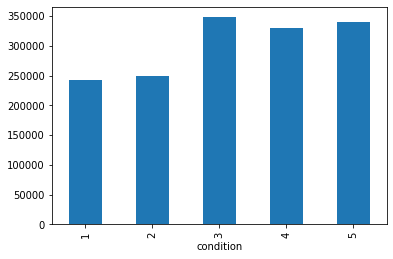

In [244]:
hp_mid.groupby('condition').price.median().plot.bar();

* the condition seems to have a positive impact on the housing price

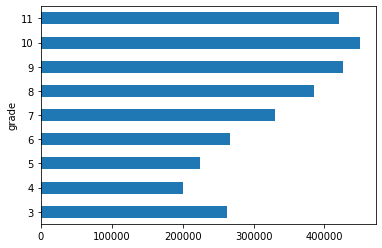

In [245]:
hp_mid.groupby('grade').price.median ().plot.barh();

* the grade seems to have a high impact on the houseprices, especially regarding the higher grades

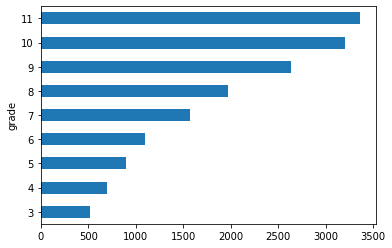

In [246]:
hp_mid.groupby('grade').sqft_living.median().plot.barh();

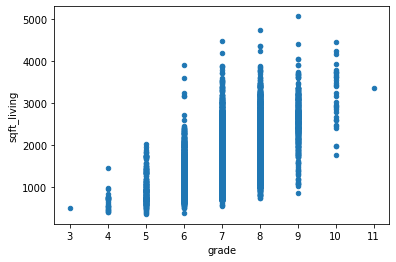

In [247]:
hp_mid.plot.scatter("grade", "sqft_living");

* the scatter plot supports the worry of the correlation between sqft_living and grade

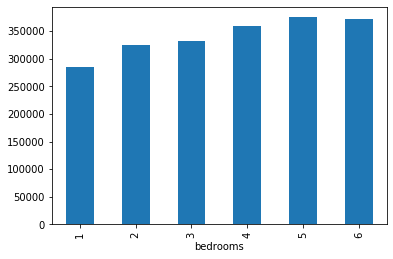

In [248]:
hp_mid.groupby('bedrooms').price.median().plot.bar();

* Unsurprisingly there seems to be a positive correlation between the number of bedrooms and the median of house prices

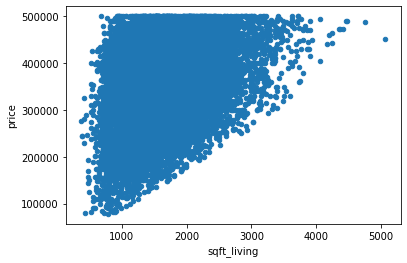

In [58]:
hp_mid.plot.scatter("sqft_living", "price")
plt.savefig('squarefoot_living');

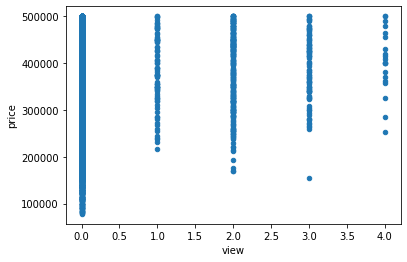

In [55]:
hp_mid.plot.scatter("view", "price");

# Looking at year built and its potential influence on the price:

* creating ranges to derive a meaningful plot

In [268]:
# creating 6 bins:
year_built_series = pd.cut(hp_mid['yr_built'], 5,
                          labels = ["very_old", "old", "medium", "new", "very_new"])

# name which occurs in the dataframe                                                
year_built_series.name = "built_bins"

# merge with the original datafraem:
hp_mid = pd.concat([hp_mid, year_built_series], axis=1)

In [269]:
hp_mid.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,built_bins
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,medium
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,old
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,very_new
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,medium
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,medium


In [270]:
year_built_seriesnb = pd.cut(hp_mid['yr_built'], 5,)
year_built_seriesnb.value_counts()

(1946.0, 1969.0]      4017
(1992.0, 2015.0]      3148
(1969.0, 1992.0]      3142
(1923.0, 1946.0]      1391
(1899.885, 1923.0]     834
Name: yr_built, dtype: int64

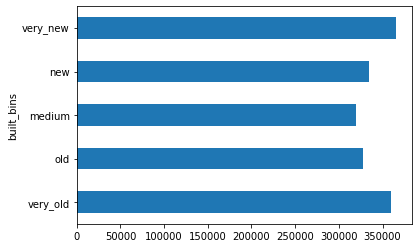

In [64]:
hp_mid.groupby('built_bins').price.median().plot.barh();

whereby,

* very old: 1900 - 1923
* old: 1923 - 1946
* mid; 1946 - 1969
* new: 1969 - 1992
* very new: 1992 - 2015

* as you can see the house prices differ across the years built
* it seems like the old houses (built up to 1938) do have on average higher prices
* newer ones from 1995 also do have higher prices than the houses between 1938 to 1976

## 05 Feature Engineering:

* Variables from the Dataset:
     * bathroom (0.32)
     * sqft_living (0.37)
     * floors (0.22)
     * grade (0.41)
     * sqft_above (0.60)
     * grade (0.41)
     * living15 (0.33)

* Defining new variables:
    * Location (maybe postal code) -> solved by graph at the end
    * Was it renovated in the last years? -> created a dummy for renovated in the last 20 years
    * year built in a dummy variable (bins)

* Was it renovated in the last years?
 -> creating a dummy variabe with 1 if it is renovated and 0 if not (overall)

In [266]:
hp_mid.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


In [272]:
# Creating dummy variables for years:
yrbuilt_dummies = pd.get_dummies(hp_mid["built_bins"])
# Dropping the reference year_range:
yrbuilt_dummies = yrbuilt_dummies.drop(["medium"], axis = 1)
# adding it to hp:
hp_mid = pd.concat([hp_mid, yrbuilt_dummies], axis=1)
hp_mid.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,built_bins,very_old,old,new,very_new
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,98178,47.5112,-122.257,1340,5650,medium,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,old,0,1,0,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,98003,47.3097,-122.327,2238,6819,very_new,0,0,0,1
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,98198,47.4095,-122.315,1650,9711,medium,0,0,0,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,98146,47.5123,-122.337,1780,8113,medium,0,0,0,0


In [274]:
#Creating dummy variable for year renovated in the last 15 years:

hp_mid['renovated'] = (hp_mid.yr_renovated > 2000).astype(int)
hp_mid.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,built_bins,very_old,old,new,very_new,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,47.5112,-122.257,1340,5650,medium,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,old,0,1,0,0,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,47.3097,-122.327,2238,6819,very_new,0,0,0,1,0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,47.4095,-122.315,1650,9711,medium,0,0,0,0,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,47.5123,-122.337,1780,8113,medium,0,0,0,0,0


In [205]:
hp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,built_bins,very_old,old,new,very_new,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,47.5112,-122.257,1340,5650,medium,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,medium,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,old,0,1,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,medium,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,new,0,0,1,0,0


In [277]:
hp_mid.shape

(12532, 27)

### Logging the variable in order to reduce Heteroscedasticity:

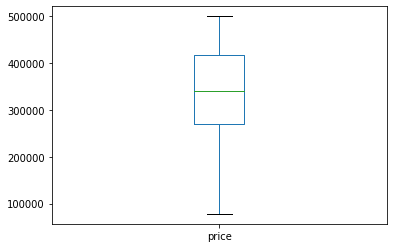

In [325]:
hp_mid.price.plot.box();

In [279]:
hp_mid['pricelog'] = np.log(hp_mid['price'])

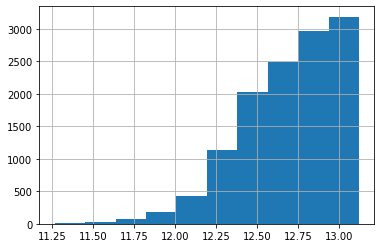

In [283]:
hp_mid.pricelog.hist();

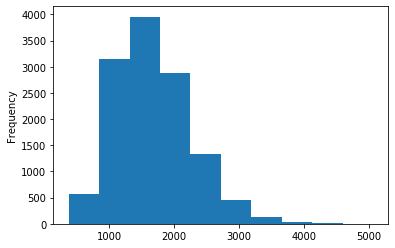

In [284]:
hp_mid.sqft_living.plot.hist();

In [301]:
hp_mid['sqft_livinglog'] = np.log(hp_mid['sqft_living'])

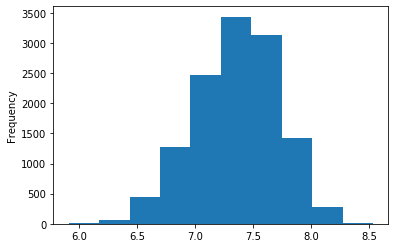

In [302]:
hp_mid.sqft_livinglog.plot.hist();

In [288]:
hp_mid.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,built_bins,very_old,old,new,very_new,renovated,pricelog,sqft_livinglog
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1340,5650,medium,0,0,0,0,0,12.309982,7.073270
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,2720,8062,old,0,1,0,0,0,12.100712,6.646391
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,2238,6819,very_new,0,0,0,1,0,12.458775,7.447168
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,1650,9711,medium,0,0,0,0,0,12.583995,6.966024
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1780,8113,medium,0,0,0,0,0,12.343658,7.484369


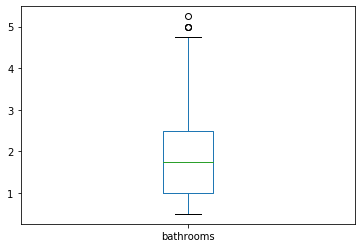

In [289]:
hp_mid.bathrooms.plot.box();

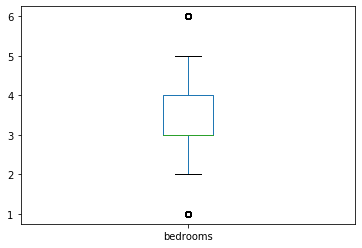

In [290]:
hp_mid.bedrooms.plot.box()

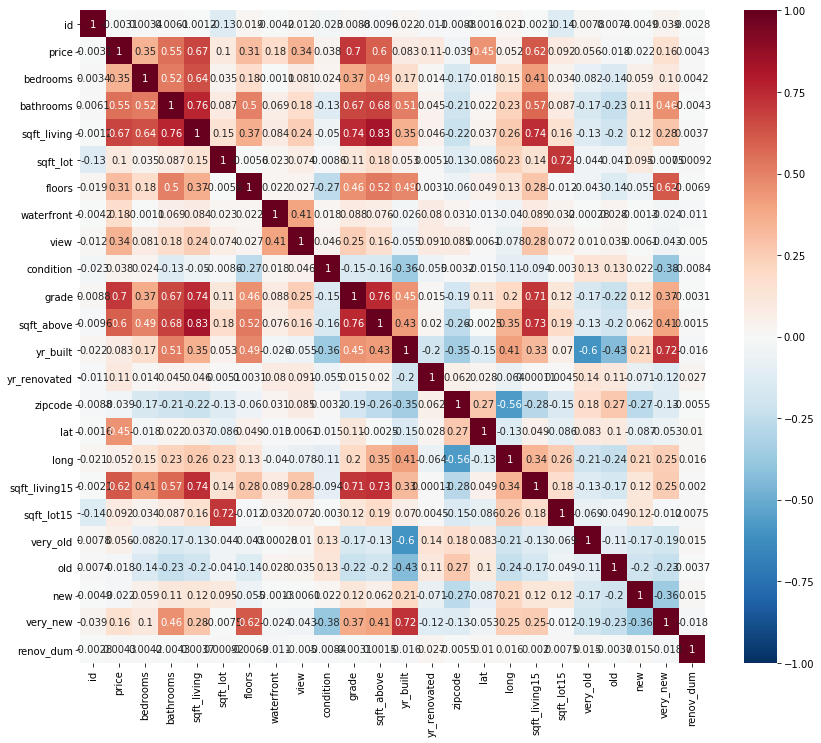

In [311]:
correlation = hp_mid.corr()
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlation, annot = True, linewidths = 0, vmin = -1, cmap="RdBu_r")

### Test the model with train data:

In [303]:
hp_mid.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'built_bins', 'very_old',
       'old', 'new', 'very_new', 'renovated', 'pricelog', 'sqft_livinglog'],
      dtype='object')

In [ ]:
smf.ols(formula='price ~ sqft_living + view + renov_dum + condition + floors + bathrooms + very_old + very_old + new + very_new', 
                    data=hp).fit().summary()

In [312]:
X = hp_mid[['sqft_livinglog', 'view', 'renovated', 'condition', 'long', 'floors', 'bathrooms', 'very_old', 'old', 'new' , 'very_new']]
y = hp_mid.pricelog

In [315]:
import sklearn

In [321]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sklearn.metrics.r2_score(y_test, y_pred)

0.2582266101734012


0.24946484573031324

## 06 Predictive Model:

### Baseline Model

In [297]:
smf.ols(formula='price ~ sqft_living', data=hp_mid).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     2017.
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:01:46   Log-Likelihood:            -1.6010e+05
No. Observations:               12532   AIC:                         3.202e+05
Df Residuals:                   12530   BIC:                         3.202e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     2.42e+05   2318.962    104.362      0.000    2.37e+05    2.47e+05
sqft_living    58.9832      1.313     44.916      0.000      56.409      61.557
==============================================================================
Omnibus:                     1458.412   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              404.790
Skew:                           0.084   Prob(JB):                     1.26e-88
Kurtosis:                       2.136   Cond. No.                     5.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model for the whole data set:

In [299]:
hp_mid.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'built_bins', 'very_old',
       'old', 'new', 'very_new', 'renovated', 'pricelog', 'sqft_livinglog'],
      dtype='object')

### More advanced multiple regression model:

In [308]:
hp_mid.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,built_bins,very_old,old,new,very_new,renovated,pricelog,sqft_livinglog
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1340,5650,medium,0,0,0,0,0,12.309982,7.073270
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,2720,8062,old,0,1,0,0,0,12.100712,6.646391
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,2238,6819,very_new,0,0,0,1,0,12.458775,7.447168
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,1650,9711,medium,0,0,0,0,0,12.583995,6.966024
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1780,8113,medium,0,0,0,0,0,12.343658,7.484369


In [61]:
smf.ols(formula='price ~ sqft_living +  renovated + view  + floors + condition + long + lat + bathrooms + very_old + old + new + very_new', 
                    data=hp_mid).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     1085.
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:47:21   Log-Likelihood:            -1.5656e+05
No. Observations:               12532   AIC:                         3.132e+05
Df Residuals:                   12519   BIC:                         3.133e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.483e+07   5.62e+05    -26.399      0.000   -1.59e+07   -1.37e+07
sqft_living    66.6726      1.390     47.957      0.000      63.947      69.398
renovated    3.051e+04   6198.737      4.923      0.000    1.84e+04    4.27e+04
view         2.234e+04   1386.110     16.114      0.000    1.96e+04    2.51e+04
floors       4494.3618   1610.688      2.790      0.005    1337.165    7651.558
condition    1.394e+04    985.172     14.152      0.000     1.2e+04    1.59e+04
long         2.008e+04   4439.876      4.523      0.000    1.14e+04    2.88e+04
lat          3.667e+05   3963.565     92.520      0.000    3.59e+05    3.74e+05
bathrooms    1.156e+04   1490.462      7.754      0.000    8635.136    1.45e+04
very_old     3.398e+04   2497.985     13.605      0.000    2.91e+04    3.89e+04
old          1.651e+04   2048.772      8.057      0.000    1.25e+04    2.05e+04
new          1.437e+04   1747.196      8.224      0.000    1.09e+04    1.78e+04
very_new     3.226e+04   2406.539     13.404      0.000    2.75e+04     3.7e+04
==============================================================================
Omnibus:                       22.635   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.671
Skew:                           0.035   Prob(JB):                     1.62e-06
Kurtosis:                       3.215   Cond. No.                     1.73e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpreting the coefficients:**
* if sqft_living rises increases by percent, the price will raise on average by 48 USD
* if the house has been renovated within the last 15 years the price will increase on averagy by 10000 USD
* if there is one additional bathroom the price will increase by 2020 USD
* if the house has been viewed one additional time the price will raise by about 13300 USD
* Baseline range for years:  mid; 1946 - 1969:
    * you would safe money if you go up to the range of 1969 - 1992 (4142.2774)
    * you have to pay more for houses built from 1992 - 2015 (11970)
    * and even more for the really old houses built between  (39580)
 

## Data Visualization

* Plotting the map and the corresponding observations:

In [336]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

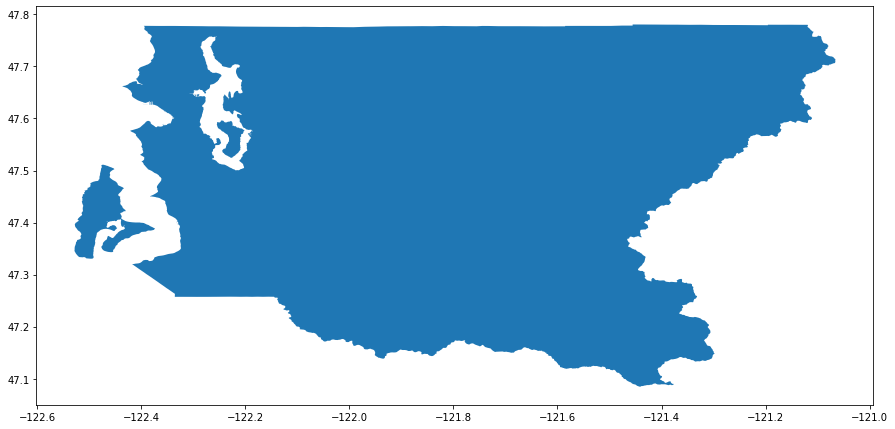

In [337]:
# Read in the shape file:
street_map = gpd.read_file('Geodata/King_County_with_Natural_Shoreline_for_Puget_Sound_and_Lake_Washington__kingsh_area.shp')

fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax);

In [338]:
# Creating geo points from lon and lat:
geometry = [Point(xy) for xy in zip(hp["long"], hp["lat"])]


In [339]:
# Creatingn geo data frame:
geo_hp = gpd.GeoDataFrame(hp, geometry = geometry)

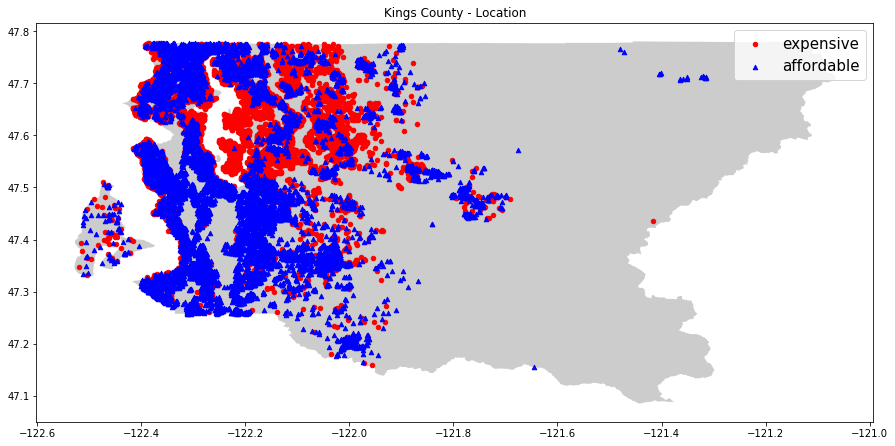

In [62]:
# Plotting the observations on the map:
fix, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color ="grey")
geo_hp[geo_hp["price"] > 500000].plot(ax=ax, markersize=20, color = "red", marker="o", label="expensive")
geo_hp[geo_hp["price"] <= 500000].plot(ax=ax, markersize=20, color = "blue", marker="^", label="affordable")
#geo_hp[(geo_hp["price"] < 500000) & (geo_hp["price"] < 300000)].plot(ax=ax, markersize=20, color = "blue", marker="^", label="mid-priced")
plt.legend(prop={"size": 15})
plt.title("Kings County - Location");

### 3 Key Takeaways:

* You save on average more than 30.000 USD if the house was not renovated -> You can save some money, if you are able to do the renovations yourself 
* one additional view costs you 23.300 USD
* Buy a house between 1946 - 1969


### Future Work:

* Goodness of fit!! (including latitude longitude)
* Location as a determinant of the price regression
* Distances to certain important factors like Public Transportation or Supermarkets or Hospitals
* Rating of nearby schools
* Run Tests